In [2]:
!nvidia-smi

Wed Mar 27 03:03:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#import os
#HOME = os.getcwd()
HOME = "/content/drive/MyDrive/FireDetection"
print(HOME)

/content/drive/MyDrive/FireDetection


In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.4/78.2 GB disk)


In [6]:
# Git clone method (for development)

%cd {HOME}
!git clone https://github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -qe ultralytics

# from IPython import display
# display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.4/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [13]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="sbeW9QIPV3L2ThATQ3Xc")
# project = rf.workspace("detection-e83li").project("smokeandfire")
# version = project.version(2)
# dataset = version.download("yolov8")
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sbeW9QIPV3L2ThATQ3Xc")
project = rf.workspace("data2").project("fire-smoke-detection-ua3dm")
version = project.version(2)
dataset = version.download("yolov8")



mkdir: cannot create directory ‘/content/drive/MyDrive/FireDetection/datasets’: File exists
/content/drive/MyDrive/FireDetection/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to fire-smoke-detection-2 in yolov8:: 100%|██████████| 1722/1722 [00:14<00:00, 120.00it/s]


## Custom Training

In [22]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=128 plots=True

/content/drive/MyDrive/FireDetection
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/FireDetection/datasets/fire-smoke-detection-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=128, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, forma

In [23]:
!ls {HOME}/runs/detect/train8/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1711509546.1c4db524c411.9850.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch760.jpg	   val_batch2_pred.jpg
PR_curve.png					    train_batch761.jpg	   weights
R_curve.png					    train_batch762.jpg
results.csv					    val_batch0_labels.jpg


/content/drive/MyDrive/FireDetection


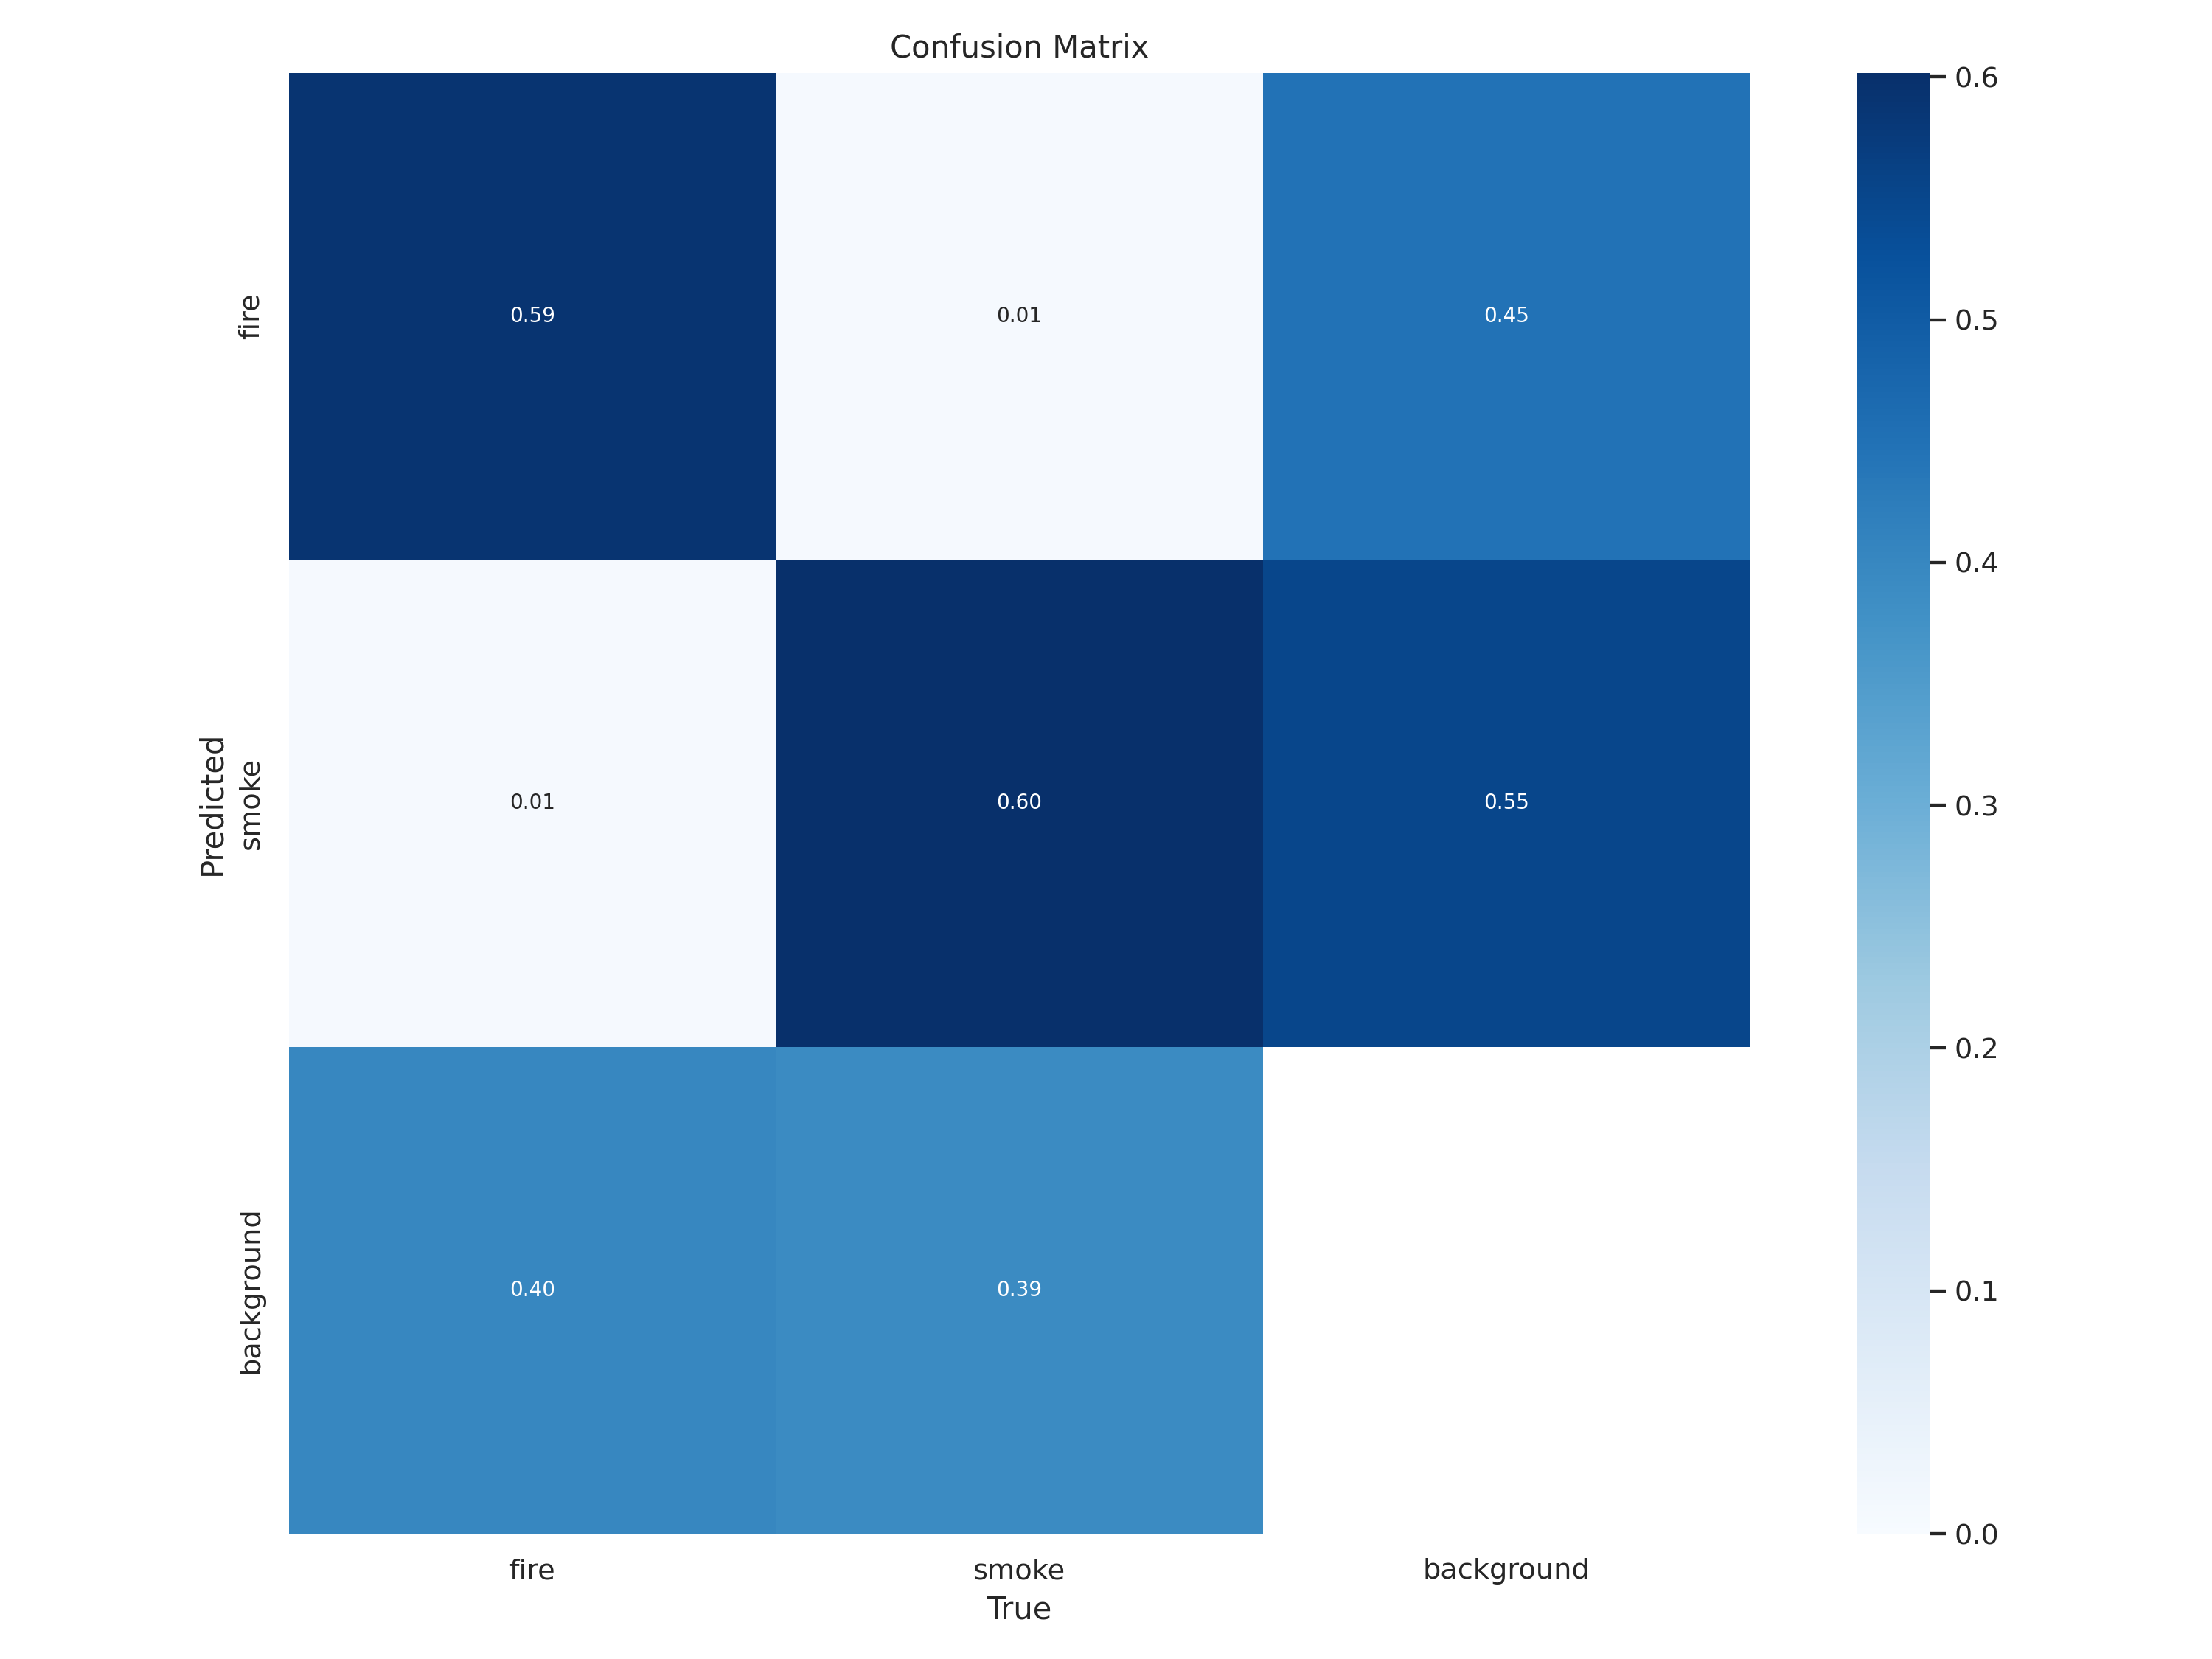

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/confusion_matrix.png', width=600)

/content/drive/MyDrive/FireDetection


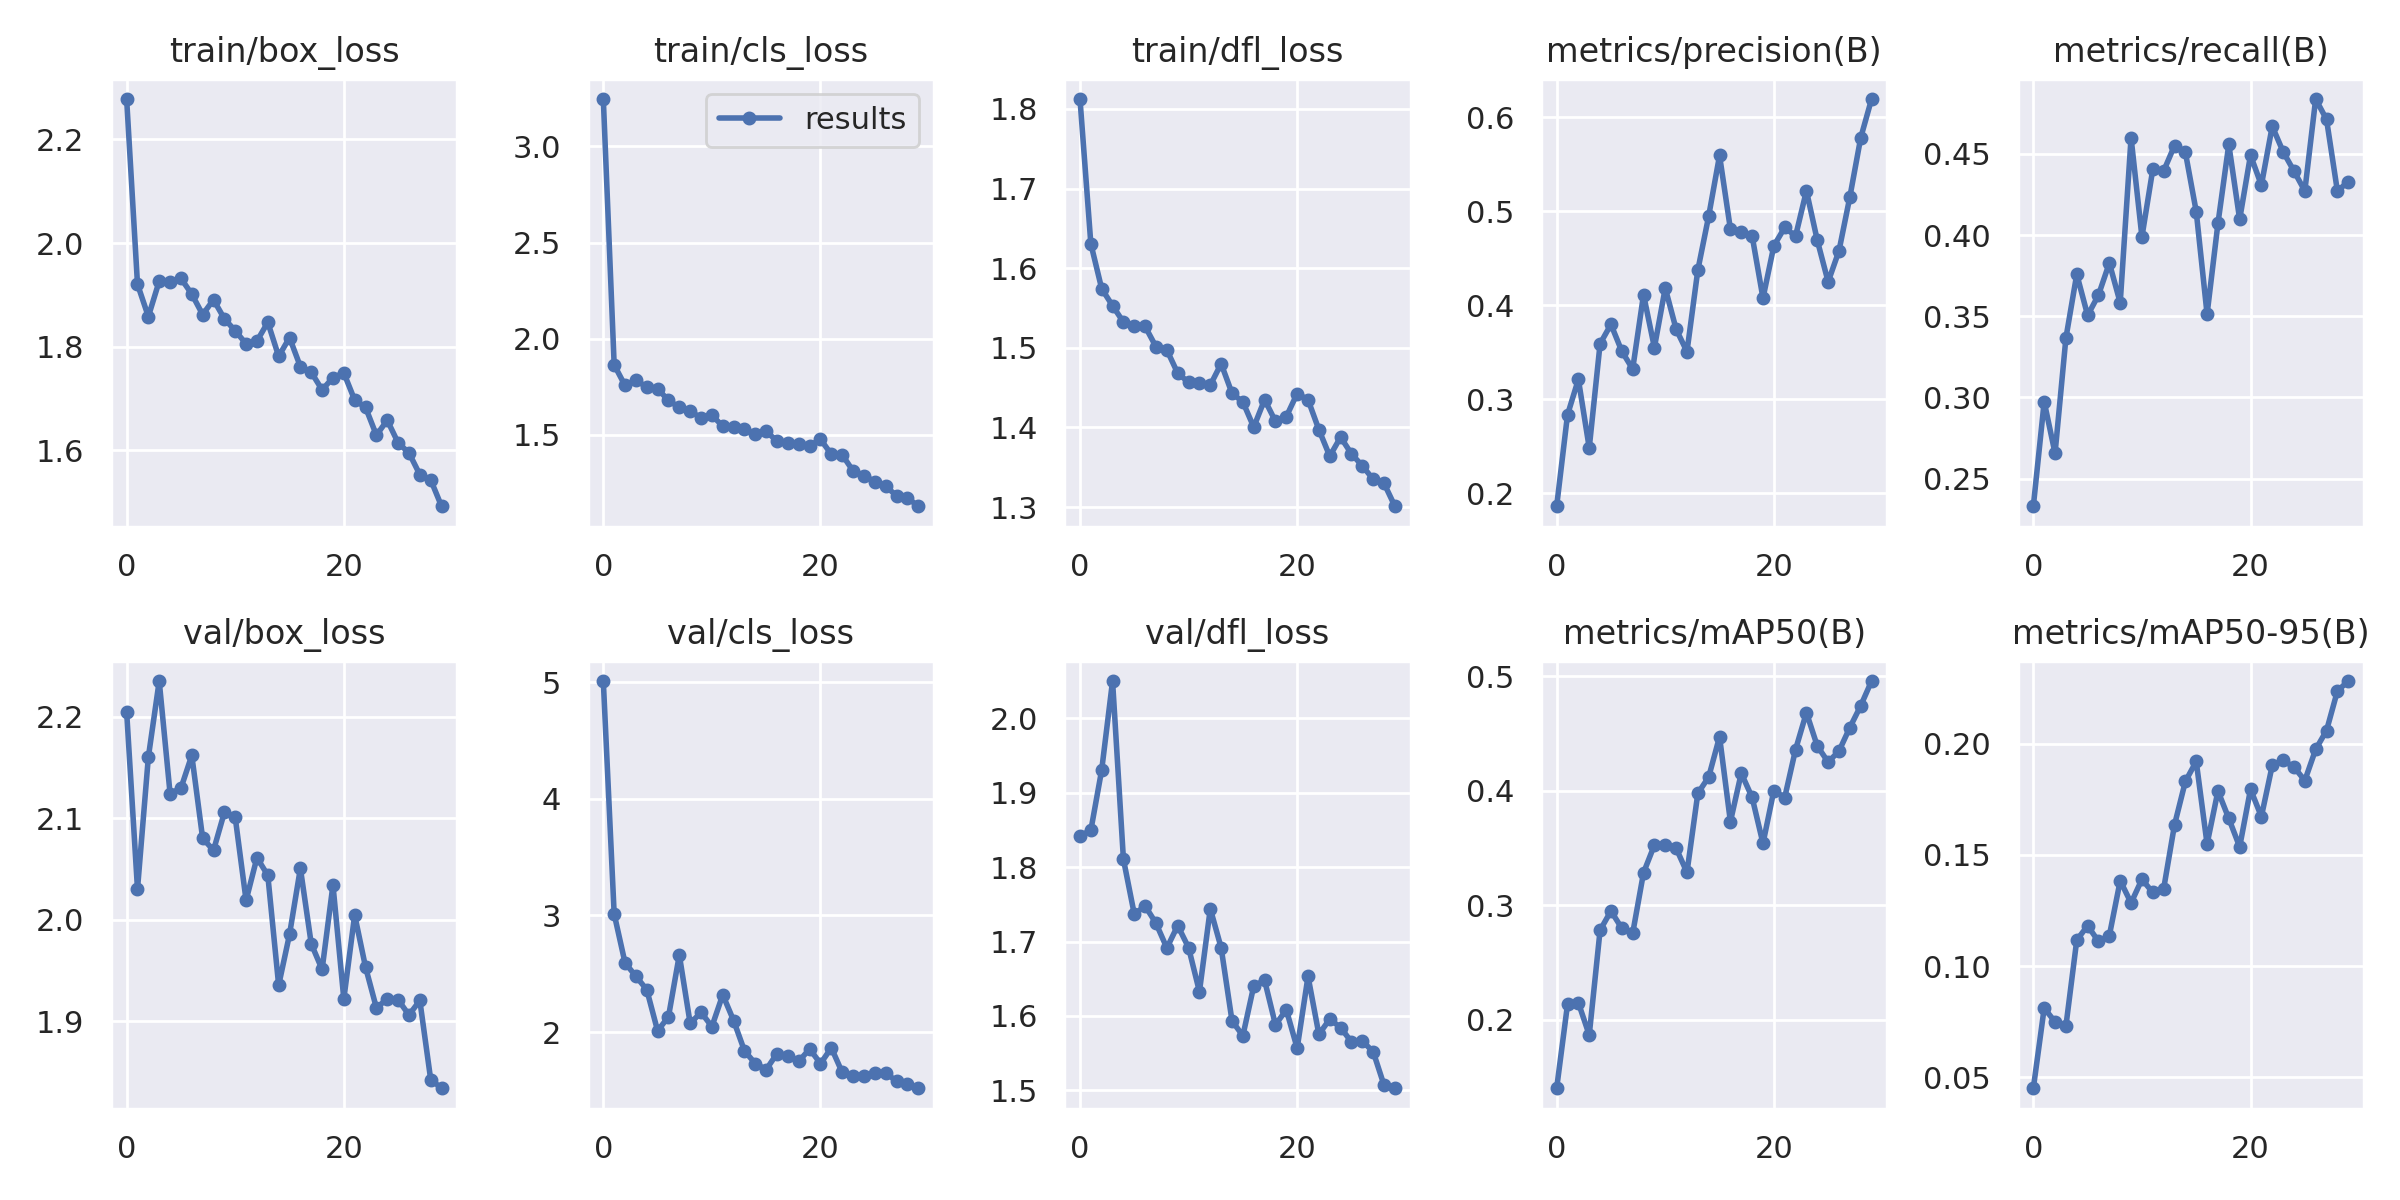

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/results.png', width=600)

/content/drive/MyDrive/FireDetection


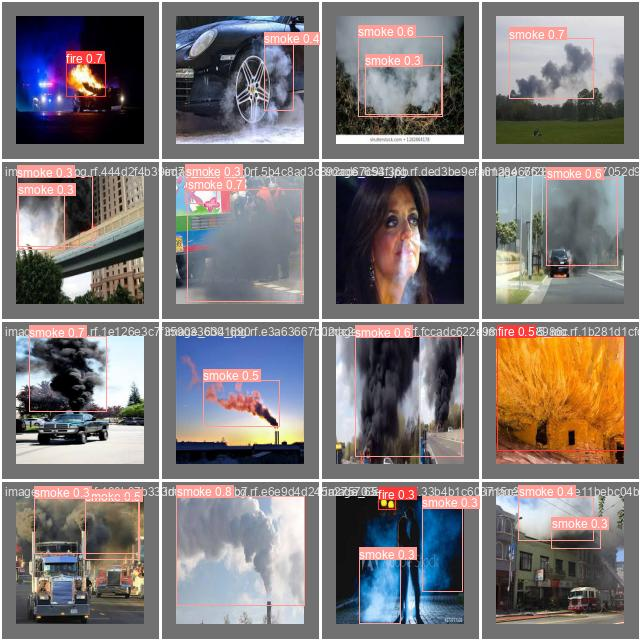

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [27]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train8/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/FireDetection
2024-03-27 03:33:22.804314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 03:33:22.804363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 03:33:22.805865: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-27 03:33:23.926361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive

## Inference with Custom Model

In [28]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/drive/MyDrive/FireDetection
2024-03-27 03:33:44.869185: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 03:33:44.869261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 03:33:44.870697: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-27 03:33:45.990799: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exc

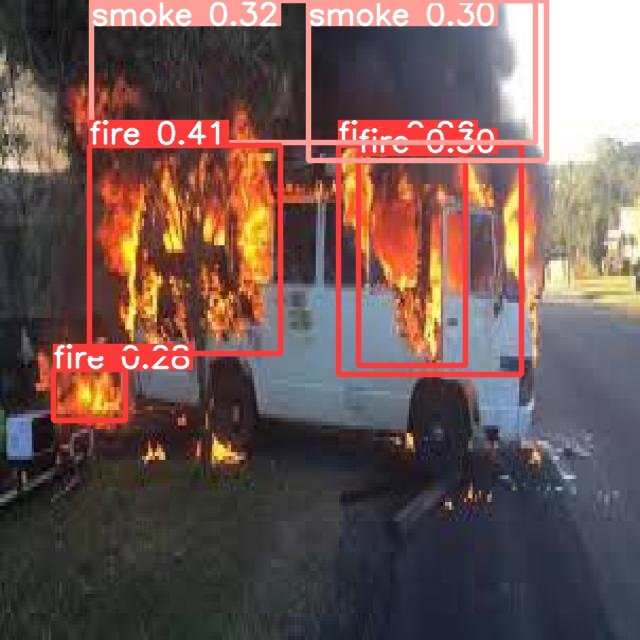

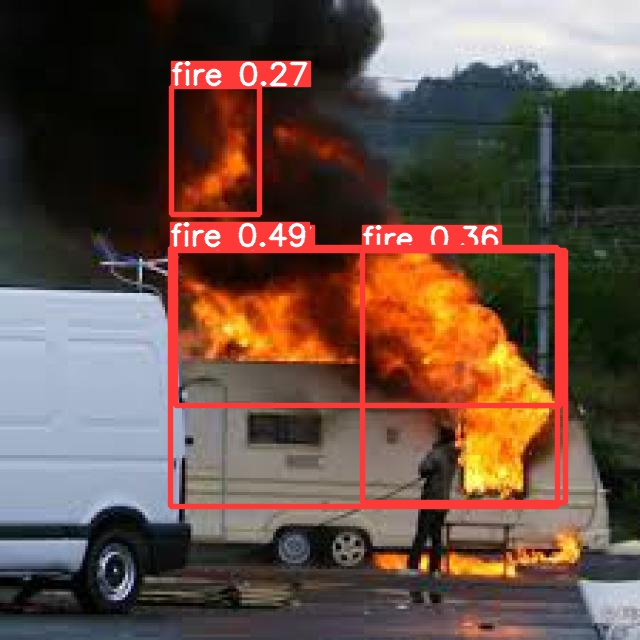

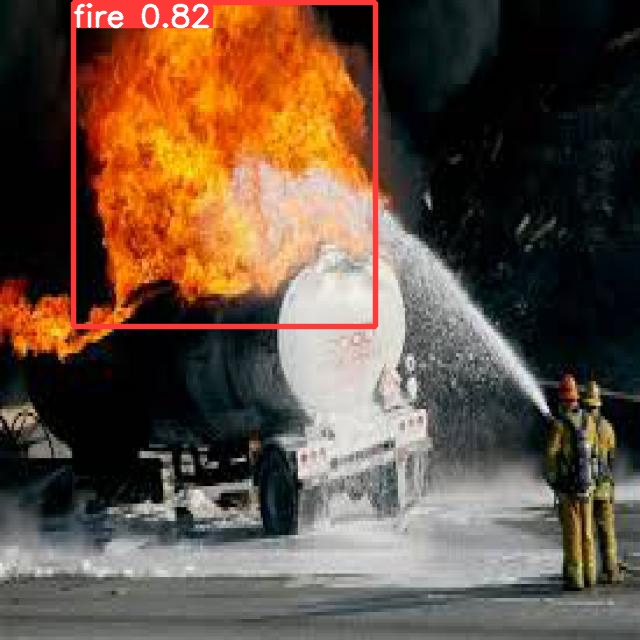

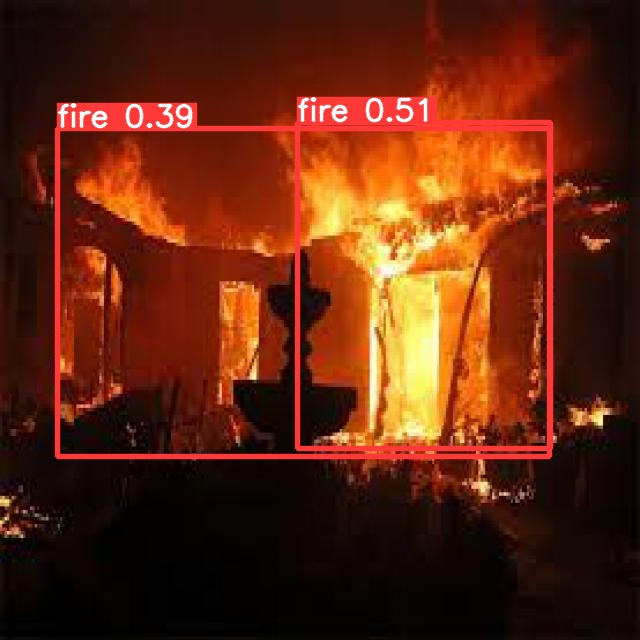

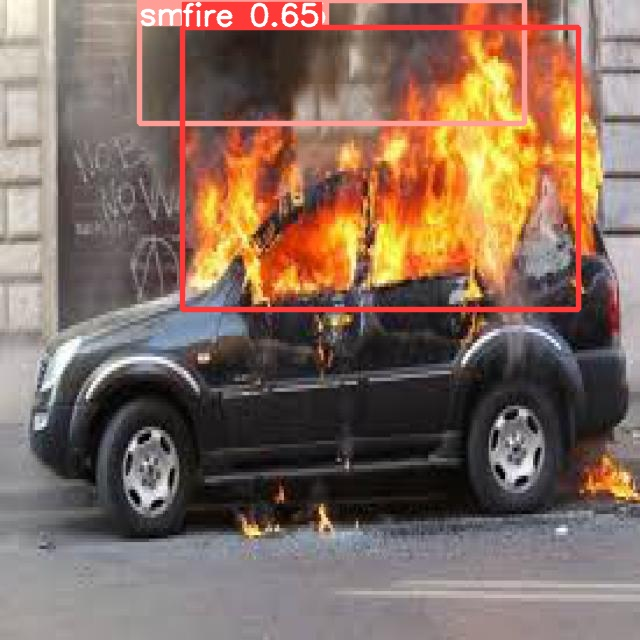

In [33]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[30:35]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [35]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt conf=0.25 source=/content/drive/MyDrive/forrest_fire.mp4 save=True

/content/drive/MyDrive/FireDetection
2024-03-27 03:39:13.990725: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 03:39:13.990780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 03:39:13.992365: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-27 03:39:15.437409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/495) /content/drive/MyD

In [37]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt conf=0.25 source=/content/drive/MyDrive/ff3.mp4 save=True

/content/drive/MyDrive/FireDetection
2024-03-27 03:49:18.213041: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 03:49:18.213097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 03:49:18.214464: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-27 03:49:19.384483: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/495) /content/drive/MyD

In [38]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt conf=0.25 source=/content/drive/MyDrive/ff2.mp4 save=True

/content/drive/MyDrive/FireDetection
2024-03-27 03:50:13.697434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 03:50:13.697484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 03:50:13.698926: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-27 03:50:14.863193: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/698) /content/drive/MyD